In [179]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [180]:
dir = 'D:\\Library\\Documents\\School\\COMP 542\\Jupyter Stuff\\SVM Algo\\images'


categories = ['arabic', 'english']


data = []


for category in categories:
    path= os.path.join(dir,category)
    label= categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        pet_img=cv2.imread(imgpath,0)
        try:
            pet_img=cv2.resize(pet_img,(50,50))
            image = np.array(pet_img).flatten()
            data.append([image, label])
        except Exception as e:
            pass


print(len(data))
#print(len(imgpath)

pick_in = open('data1.pickle', 'wb')
pickle.dump(data,pick_in)
pick_in.close()


# cv2.waitKey(0)
# cv2.destroyAllWindows()

200


Accuracy:  0.8826530612244898
Prediction is:  english


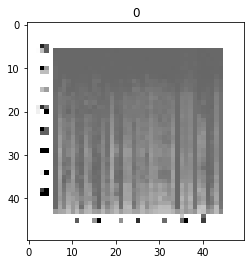

Label 0 == Arabic | Label 1 == English
Correct Answer: arabic


In [181]:
pick_in = open('data1.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features = []
labels = []

for feature ,label in data:
    features.append(feature)
    labels.append(label)

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.98)


model = SVC(C=1,kernel='poly',gamma= 'auto')
model.fit(xtrain, ytrain)

pick = open('model.sav','wb')
pickle.dump(model,pick)
pick.close()

prediction = model.predict(xtest)

accuracy = model.score(xtest,ytest)

print('Accuracy: ', accuracy)

print('Prediction is: ', categories[prediction[0]])

mypet=xtest[0].reshape(50,50)
plt.imshow(mypet,cmap='gray') # cmap = binary
plt.title(label)
plt.show()
print("Label 0 == Arabic | Label 1 == English")
print("Correct Answer: " + str(categories[label]))
#print(str(data))